# Frangi's Vesselness Filter

In [1]:
%run "000_includez.ipynb"

In [1]:
import skimage
import cv2

## Input Image
Source: `skimage.data` 

Type: Retina image

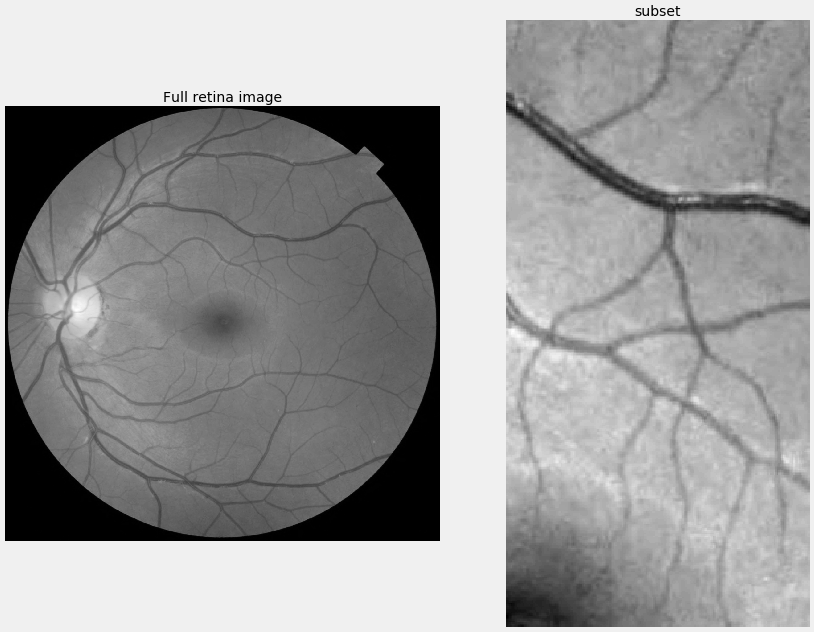

In [3]:
img_full = skimage.color.rgb2gray( skimage.data.retina() )
skimage.io
img = img_full[300:700, 700:900] 
#show_image_hist(img)
show_image_list([img_full, img], titlez=['Full retina image', 'subset'])

## Frangi's Vesselness Filter Vs Sato
**Frangi's**: Detects continuous ridges or vessels and can also be used to calculate the propotion of the image that contains vessels. 

- Uses Eigenvalyes of the Hessian to compute similarity of a pixel region to vessel 
- Parameters: `sigma` for scale 
- `skimage.filters.frangi` 


**Sato's**: Similar to Frangi but uses only some of the eigenvalues instead of all at the same time. Frangi is a generalization of Sato's. 
-  `skimage.filters.sato` 
    

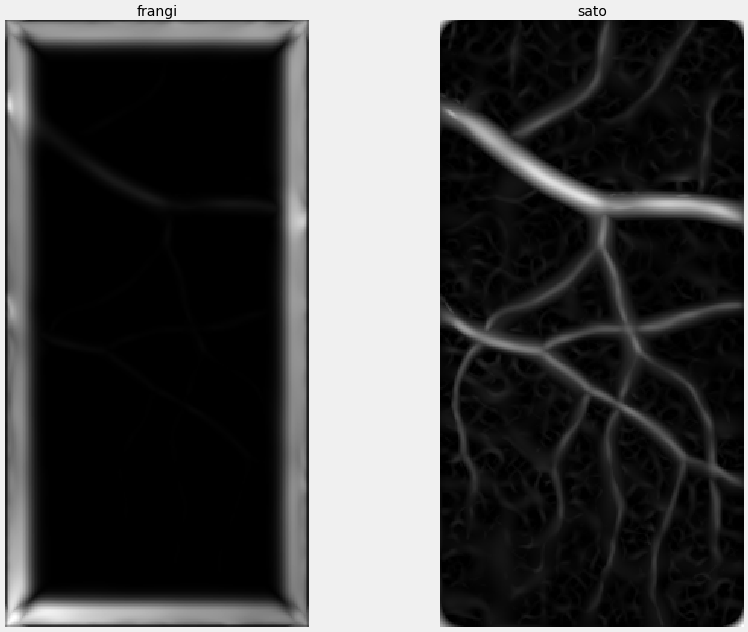

In [26]:
sigmaz = [ x/10 for x in range(4,100,2)]
paramz = {'sigmas':sigmaz, 'black_ridges':1 }

img_frangi = skimage.filters.frangi(img, **paramz)
img_sato = skimage.filters.sato(img, **paramz)

show_image_list([img_frangi, img_sato], titlez=['frangi', 'sato'])

## Frangi's vesselness filter Vs Morphological
**Morphological:**

In [5]:
def morph_vessel_enhance(img, dilate=2, erode=1):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-5-4df1d1b47c27>, line 2)

## Frangi's vesselness filter Vs Other Ridge Filters
- **Meijering neurites:**
- **Hybrid Hessian:** 


In [16]:
def compare_ridge_filterz(img, filterz, paramz):
    outsiez = []
    titlez = []
    for i, filt in enumerate(filterz):
        outsiez.append( filt[0](img, **paramz)  )
        titlez.append( filt[1] )
    show_image_list( outsiez, titlez=titlez, nc=len(outsiez))
        

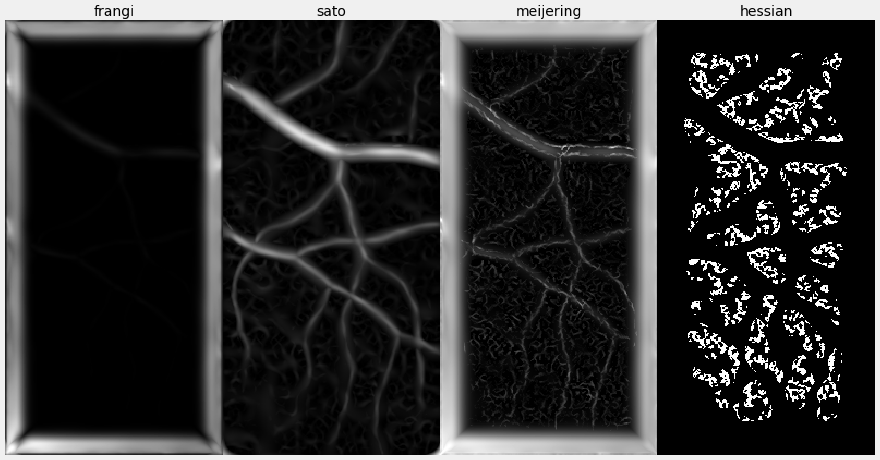

In [25]:
filterz = [
    (skimage.filters.frangi, 'frangi'),
    (skimage.filters.sato, 'sato'),
    (skimage.filters.meijering, 'meijering'),
    (skimage.filters.hessian, 'hessian'),
]

compare_ridge_filterz(img, filterz, paramz)

# Frangi's Vs Edge Operators
**Edge Operators:** discrete differential operators that find an approximation of the gradient (1st order derivative) of the image intensities. Some make use of 2nd order derivative such as sobel and canny edge detectors

- **Sobel:** 
    - 
    
- **Canny:**
    - 
    
- **Scharr:**
    - lesser rotational variance than sobel
    - 

In [27]:
def apply_edge_operators(img, filterz, ifrangi=img_frangi):
    outsiez = [ifrangi]
    titlez = ['frangi']
    
    for filt in filterz:
        outsiez.append( filt[1](img, **filt[2]) )
        titlez.append( filt[0])
    
    show_image_list(outsiez, titlez=titlez, nc=len(outsiez) )
    

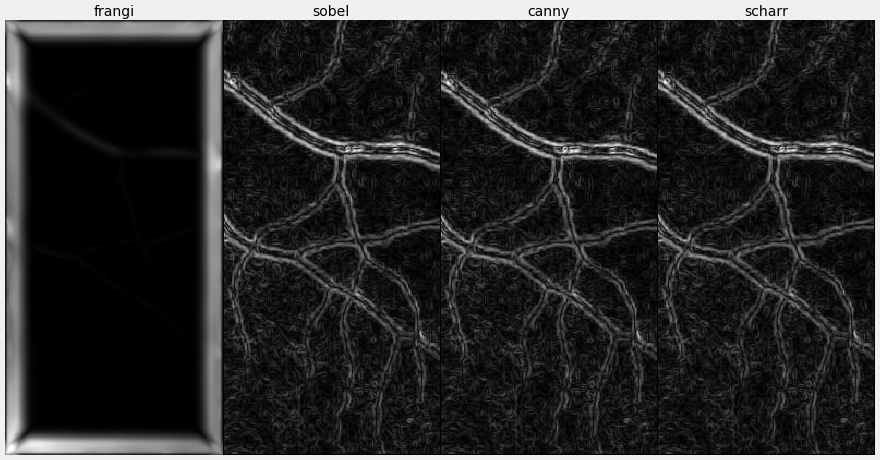

In [28]:
edge_filterz = [
    ('sobel', skimage.filters.sobel, {}),
    ('canny', skimage.filters.sobel, {}),
    ('scharr', skimage.filters.sobel, {}),
]

apply_edge_operators(img, edge_filterz)